In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Set custom color palette
PRIMARY_COLOR = '#E8E5DB'  # Background/primary color
SECONDARY_COLOR = '#2D5F4F'  # Headers/accents
TEXT_COLOR = '#1A1A1A'

# Configure seaborn and matplotlib
sns.set_style('whitegrid')
plt.rcParams['figure.facecolor'] = PRIMARY_COLOR

print("✓ Libraries loaded successfully")
print(f"✓ Color scheme: Primary={PRIMARY_COLOR}, Secondary={SECONDARY_COLOR}")


✓ Libraries loaded successfully
✓ Color scheme: Primary=#E8E5DB, Secondary=#2D5F4F


In [26]:
# Generate mock financial data for both companies (in millions EUR)
years = ['2021', '2022', '2023', '2024']

# Stellantis financial data
stellantis_data = {
    'Current Assets': [74795, 84776, 91520, 81578],
    'Current Liabilities': [64857, 66825, 73940, 75186],
    'Inventory': [11361, 17360, 21414, 20861],
    'Cash and Cash Equivalents': [48616, 45335, 42419, 32409],
    'Revenue': [149419, 179592, 189544, 156878],  
    'Total Assets': [171766, 186156, 202128, 207607],  
    'Fixed Assets': [96971, 101380, 110608, 126029], 
    'Accounts Receivable': [2998, 4928, 6426, 5506], 
    'Accounts Payable': [28181, 31726, 33008, 29684],  
    'Cost of Goods Sold': [119943, 144327, 151400, 136360],
    'EBIT': [15859, 21084, 22984, 5435],#check everything down
    'Interest Expense': [678, 629, 663, 549],
    'Total Debt': [86000, 93000, 101000, 103800],
    'Total Equity': [85766, 93156, 101128, 103807],
    'Intangible Assets': [12000, 12500, 13000, 13500]
}

# Mercedes Benz financial data
mercedes_data = {
    'Current Assets': [102929, 102874, 104032, 101767], 
    'Current Liabilities': [87675, 88403, 83290, 74826], 
    'Inventory': [21466, 25621, 26486, 26234], 
    'Cash and Cash Equivalents': [23120, 17679, 15962, 14511], 
    'Revenue': [133893, 150017, 152390, 145594],
    'Total Assets': [259831, 260015, 263022, 265010], 
    'Fixed Assets': [156902, 157141, 158990, 163243], 
    'Accounts Receivable': [7673, 8100, 7281, 6973], 
    'Accounts Payable': [10655, 12204, 12705, 11312], 
    'Cost of Goods Sold': [103218, 115997, 117386, 117018],
    'EBIT': [9372, 10501, 10667, 10192], #check everything down
    'Interest Expense': [468, 525, 533, 510],
    'Total Debt': [130000, 132000, 135000, 138000],
    'Total Equity': [129831, 128015, 128022, 127010],
    'Intangible Assets': [25000, 25500, 26000, 26500]
}

# Create DataFrames
df_stellantis = pd.DataFrame(stellantis_data, index=years)
df_mercedes = pd.DataFrame(mercedes_data, index=years)

print("✓ Mock financial data generated")
print(f"  - Time period: {years[0]} to {years[-1]}")
print(f"  - Currency: EUR (millions)")


✓ Mock financial data generated
  - Time period: 2021 to 2024
  - Currency: EUR (millions)


In [27]:
# Ratio Calculations

# Liquidity Ratios
# Working Capital
wc_stellantis = df_stellantis['Current Assets'] - df_stellantis['Current Liabilities']
wc_mercedes = df_mercedes['Current Assets'] - df_mercedes['Current Liabilities']

# Current Ratio
cr_stellantis = df_stellantis['Current Assets'] / df_stellantis['Current Liabilities']
cr_mercedes = df_mercedes['Current Assets'] / df_mercedes['Current Liabilities']

# Quick Ratio (Acid-Test Ratio)
qr_stellantis = (df_stellantis['Current Assets'] - df_stellantis['Inventory']) / df_stellantis['Current Liabilities']
qr_mercedes = (df_mercedes['Current Assets'] - df_mercedes['Inventory']) / df_mercedes['Current Liabilities']

# Cash Ratio
cash_r_stellantis = df_stellantis['Cash and Cash Equivalents'] / df_stellantis['Current Liabilities']
cash_r_mercedes = df_mercedes['Cash and Cash Equivalents'] / df_mercedes['Current Liabilities']

# Turnover Ratios
# Helper function to calculate averages for balance sheet items
def calc_avg(series):
    avg_series = []
    for i in range(len(series)):
        if i == 0:
            avg_series.append(series.iloc[i])  # Use .iloc for positional access
        else:
            avg_series.append((series.iloc[i] + series.iloc[i-1]) / 2)
    return pd.Series(avg_series, index=series.index)

# Stellantis - Calculate averages
stellantis_avg_total_assets = calc_avg(df_stellantis['Total Assets'])
stellantis_avg_fixed_assets = calc_avg(df_stellantis['Fixed Assets'])
stellantis_avg_ar = calc_avg(df_stellantis['Accounts Receivable'])
stellantis_avg_inventory = calc_avg(df_stellantis['Inventory'])
stellantis_avg_ap = calc_avg(df_stellantis['Accounts Payable'])

# Mercedes - Calculate averages
mercedes_avg_total_assets = calc_avg(df_mercedes['Total Assets'])
mercedes_avg_fixed_assets = calc_avg(df_mercedes['Fixed Assets'])
mercedes_avg_ar = calc_avg(df_mercedes['Accounts Receivable'])
mercedes_avg_inventory = calc_avg(df_mercedes['Inventory'])
mercedes_avg_ap = calc_avg(df_mercedes['Accounts Payable'])

# Stellantis turnover ratios
tot_asset_turn_s = df_stellantis['Revenue'] / stellantis_avg_total_assets
fixed_asset_turn_s = df_stellantis['Revenue'] / stellantis_avg_fixed_assets
ar_turn_s = df_stellantis['Revenue'] / stellantis_avg_ar
ar_days_s = 365 / ar_turn_s
inv_turn_s = df_stellantis['Cost of Goods Sold'] / stellantis_avg_inventory
inv_days_s = 365 / inv_turn_s
ap_turn_s = df_stellantis['Cost of Goods Sold'] / stellantis_avg_ap
ap_days_s = 365 / ap_turn_s

# Mercedes turnover ratios
tot_asset_turn_m = df_mercedes['Revenue'] / mercedes_avg_total_assets
fixed_asset_turn_m = df_mercedes['Revenue'] / mercedes_avg_fixed_assets
ar_turn_m = df_mercedes['Revenue'] / mercedes_avg_ar
ar_days_m = 365 / ar_turn_m
inv_turn_m = df_mercedes['Cost of Goods Sold'] / mercedes_avg_inventory
inv_days_m = 365 / inv_turn_m
ap_turn_m = df_mercedes['Cost of Goods Sold'] / mercedes_avg_ap
ap_days_m = 365 / ap_turn_m

# Solvency Ratios
# Times Interest Earned (TIE)
tie_stellantis = df_stellantis['EBIT'] / df_stellantis['Interest Expense']
tie_mercedes = df_mercedes['EBIT'] / df_mercedes['Interest Expense']

# Debt Ratio
debt_ratio_stellantis = df_stellantis['Total Debt'] / df_stellantis['Total Assets']
debt_ratio_mercedes = df_mercedes['Total Debt'] / df_mercedes['Total Assets']

# Debt-to-Equity Ratio
debt_to_equity_stellantis = df_stellantis['Total Debt'] / df_stellantis['Total Equity']
debt_to_equity_mercedes = df_mercedes['Total Debt'] / df_mercedes['Total Equity']

# Debt-to-Tangible Net Worth
debt_to_tangible_nw_stellantis = df_stellantis['Total Debt'] / (df_stellantis['Total Equity'] - df_stellantis['Intangible Assets'])
debt_to_tangible_nw_mercedes = df_mercedes['Total Debt'] / (df_mercedes['Total Equity'] - df_mercedes['Intangible Assets'])

print("✓ All ratios calculated successfully")


✓ All ratios calculated successfully


In [28]:
# Create table with alternating columns
years_reversed = years[::-1]
columns = []
for year in years_reversed:
    columns.extend([f'{year} Stellantis', f'{year} Mercedes'])

# Organize data for liquidity ratios
ratio_names_liquidity = ['Working Capital (M€)', 'Current Ratio', 'Quick Ratio', 'Cash Ratio']
liquidity_data = {}

for ratio_idx, ratio_name in enumerate(ratio_names_liquidity):
    ratio_values = []
    for year in years_reversed:
        original_idx = years.index(year)
        if ratio_idx == 0:
            ratio_values.extend([wc_stellantis.iloc[original_idx], wc_mercedes.iloc[original_idx]])
        elif ratio_idx == 1:
            ratio_values.extend([cr_stellantis.iloc[original_idx], cr_mercedes.iloc[original_idx]])
        elif ratio_idx == 2:
            ratio_values.extend([qr_stellantis.iloc[original_idx], qr_mercedes.iloc[original_idx]])
        elif ratio_idx == 3:
            ratio_values.extend([cash_r_stellantis.iloc[original_idx], cash_r_mercedes.iloc[original_idx]])
    liquidity_data[ratio_name] = ratio_values

liquidity_df = pd.DataFrame(liquidity_data, index=columns).T

# Create formatted DataFrame with enhanced change indicators for liquidity ratios
formatted_liquidity_data = {}
for ratio_name in liquidity_df.index:
    is_currency = 'Working Capital' in ratio_name
    formatted_row = []
    for col_idx in range(len(liquidity_df.columns)):
        current_value = liquidity_df.iloc[liquidity_df.index.get_loc(ratio_name), col_idx]
        
        # Compare with PREVIOUS year for the same company
        if col_idx + 2 < len(liquidity_df.columns):
            prev_year_idx = col_idx + 2
            prev_value = liquidity_df.iloc[liquidity_df.index.get_loc(ratio_name), prev_year_idx]
            change = current_value - prev_value
            if change > 0:
                indicator = ' <span style="color: green;">▲</span>'
            elif change < 0:
                indicator = ' <span style="color: red;">▼</span>'
            else:
                indicator = ''
        else:
            indicator = ''
        
        formatted_value = f'{current_value:,.0f}{indicator}' if is_currency else f'{current_value:.2f}{indicator}'
        formatted_row.append(formatted_value)
    formatted_liquidity_data[ratio_name] = formatted_row

formatted_liquidity_df = pd.DataFrame(formatted_liquidity_data, index=liquidity_df.columns).T

# Aesthetic styling with conditional formatting for liquidity ratios
def create_styled_liquidity_table(df, original_df):
    colors = {
        'header_bg': '#1a4d3e',
        'header_text': '#ffffff',
        'row_header_bg': '#2d5f4f',
        'stellantis_bg': '#e8e5db',
        'mercedes_bg': '#d4e8e0',
        'excellent': '#a8d5ba',
        'good': '#d4e8d4',
        'fair': '#fff8dc',
        'poor': '#f5d5d5',
        'border': '#b0aea8',
        'shadow': 'rgba(45, 95, 79, 0.15)'
    }
    
    styles = [
        {'selector': 'thead th', 'props': [
            ('background-color', colors['header_bg']),
            ('color', colors['header_text']),
            ('font-weight', '700'),
            ('text-align', 'center'),
            ('padding', '16px 10px'),
            ('font-size', '12px'),
            ('border', f'1px solid {colors["header_bg"]}'),
            ('white-space', 'nowrap'),
            ('text-transform', 'uppercase'),
            ('letter-spacing', '0.5px'),
            ('box-shadow', f'0 2px 4px {colors["shadow"]}')
        ]},
        {'selector': 'tbody th', 'props': [
            ('background-color', colors['row_header_bg']),
            ('color', colors['header_text']),
            ('font-weight', '600'),
            ('text-align', 'left'),
            ('padding', '14px 16px'),
            ('font-size', '13px'),
            ('border', f'1px solid {colors["header_bg"]}'),
            ('min-width', '200px'),
            ('letter-spacing', '0.3px')
        ]},
        {'selector': 'tbody td', 'props': [
            ('text-align', 'center'),
            ('padding', '14px 12px'),
            ('font-size', '14px'),
            ('border', f'1px solid {colors["border"]}'),
            ('font-family', '"Segoe UI", Arial, sans-serif'),
            ('font-weight', '600'),
            ('color', '#1a1a1a'),
            ('transition', 'all 0.2s ease')
        ]},
        {'selector': 'tbody td:nth-child(odd)', 'props': [
            ('background-color', colors['stellantis_bg']),
            ('border-right', f'1px solid {colors["border"]}')
        ]},
        {'selector': 'tbody td:nth-child(even)', 'props': [
            ('background-color', colors['mercedes_bg']),
            ('border-right', f'1px solid {colors["row_header_bg"]}')
        ]},
        {'selector': '', 'props': [
            ('border-collapse', 'separate'),
            ('border-spacing', '0'),
            ('width', '100%'),
            ('margin', '20px 0')
        ]},
        {'selector': 'caption', 'props': [
            ('color', colors['header_bg']),
            ('font-size', '16px'),
            ('font-weight', '600'),
            ('padding', '15px 10px 10px'),
            ('caption-side', 'top'),
            ('text-align', 'left')
        ]}
    ]
    
    styled = df.style.set_table_styles(styles)
    
    def get_cell_color(value, ratio_name):
        if pd.isna(value):
            return ''
        
        if 'Current Ratio' in ratio_name:
            if value >= 1.5:
                return f'background-color: {colors["excellent"]};'
            elif value >= 1.2:
                return f'background-color: {colors["good"]};'
            elif value >= 0.8:
                return f'background-color: {colors["fair"]};'
            else:
                return f'background-color: {colors["poor"]};'
        
        elif 'Quick Ratio' in ratio_name:
            if value >= 1.2:
                return f'background-color: {colors["excellent"]};'
            elif value >= 1.0:
                return f'background-color: {colors["good"]};'
            elif value >= 0.7:
                return f'background-color: {colors["fair"]};'
            else:
                return f'background-color: {colors["poor"]};'
        
        elif 'Cash Ratio' in ratio_name:
            if value >= 0.5:
                return f'background-color: {colors["excellent"]};'
            elif value >= 0.3:
                return f'background-color: {colors["good"]};'
            elif value >= 0.2:
                return f'background-color: {colors["fair"]};'
            else:
                return f'background-color: {colors["poor"]};'
        
        return ''
    
    def style_row(row):
        ratio_name = row.name
        styles = []
        for col_name in df.columns:
            try:
                numeric_value = original_df.loc[ratio_name, col_name]
                cell_style = get_cell_color(numeric_value, ratio_name)
                styles.append(cell_style)
            except:
                styles.append('')
        return styles
    
    styled = styled.apply(style_row, axis=1)
    styled = styled.set_caption('Comprehensive Liquidity Ratios Comparison')
    
    return styled

styled_liquidity_table = create_styled_liquidity_table(formatted_liquidity_df, liquidity_df)
display(styled_liquidity_table)


,2024 Stellantis,2024 Mercedes,2023 Stellantis,2023 Mercedes,2022 Stellantis,2022 Mercedes,2021 Stellantis,2021 Mercedes
Working Capital (M€),"6,392 ▼","26,941 ▲","17,580 ▼","20,742 ▲","17,951 ▲","14,471 ▼","9,938","15,254"
Current Ratio,1.09 ▼,1.36 ▲,1.24 ▼,1.25 ▲,1.27 ▲,1.16 ▼,1.15,1.17
Quick Ratio,0.81 ▼,1.01 ▲,0.95 ▼,0.93 ▲,1.01 ▲,0.87 ▼,0.98,0.93
Cash Ratio,0.43 ▼,0.19 ▲,0.57 ▼,0.19 ▼,0.68 ▼,0.20 ▼,0.75,0.26


## Turnover Ratios Comparison


In [29]:
# Create table with alternating columns
years_reversed = years[::-1]
columns = []
for year in years_reversed:
    columns.extend([f'{year} Stellantis', f'{year} Mercedes'])

# Organize data for turnover ratios
ratio_names_turnover = [
    'Total Asset Turnover',
    'Fixed Asset Turnover',
    'AR Turnover',
    'AR Days',
    'Inventory Turnover',
    'Inventory Days',
    'AP Turnover',
    'AP Days'
]
turnover_data = {}

for ratio_idx, ratio_name in enumerate(ratio_names_turnover):
    ratio_values = []
    for year in years_reversed:
        original_idx = years.index(year)
        if ratio_idx == 0:  # Total Asset Turnover
            ratio_values.extend([tot_asset_turn_s.iloc[original_idx], tot_asset_turn_m.iloc[original_idx]])
        elif ratio_idx == 1:  # Fixed Asset Turnover
            ratio_values.extend([fixed_asset_turn_s.iloc[original_idx], fixed_asset_turn_m.iloc[original_idx]])
        elif ratio_idx == 2:  # AR Turnover
            ratio_values.extend([ar_turn_s.iloc[original_idx], ar_turn_m.iloc[original_idx]])
        elif ratio_idx == 3:  # AR Days
            ratio_values.extend([ar_days_s.iloc[original_idx], ar_days_m.iloc[original_idx]])
        elif ratio_idx == 4:  # Inventory Turnover
            ratio_values.extend([inv_turn_s.iloc[original_idx], inv_turn_m.iloc[original_idx]])
        elif ratio_idx == 5:  # Inventory Days
            ratio_values.extend([inv_days_s.iloc[original_idx], inv_days_m.iloc[original_idx]])
        elif ratio_idx == 6:  # AP Turnover
            ratio_values.extend([ap_turn_s.iloc[original_idx], ap_turn_m.iloc[original_idx]])
        elif ratio_idx == 7:  # AP Days
            ratio_values.extend([ap_days_s.iloc[original_idx], ap_days_m.iloc[original_idx]])
    turnover_data[ratio_name] = ratio_values

turnover_df = pd.DataFrame(turnover_data, index=columns).T

# Create formatted DataFrame with change indicators for turnover ratios
formatted_turnover_data = {}
for ratio_name in turnover_df.index:
    is_days = 'Days' in ratio_name
    formatted_row = []
    for col_idx in range(len(turnover_df.columns)):
        current_value = turnover_df.iloc[turnover_df.index.get_loc(ratio_name), col_idx]
        
        # Compare with PREVIOUS year for the same company
        if col_idx + 2 < len(turnover_df.columns):
            prev_year_idx = col_idx + 2
            prev_value = turnover_df.iloc[turnover_df.index.get_loc(ratio_name), prev_year_idx]
            change = current_value - prev_value
            if change > 0:
                indicator = ' <span style="color: green;">▲</span>'
            elif change < 0:
                indicator = ' <span style="color: red;">▼</span>'
            else:
                indicator = ''
        else:
            indicator = ''
        
        formatted_value = f'{current_value:.1f}{indicator}' if is_days else f'{current_value:.2f}{indicator}'
        formatted_row.append(formatted_value)
    formatted_turnover_data[ratio_name] = formatted_row

formatted_turnover_df = pd.DataFrame(formatted_turnover_data, index=turnover_df.columns).T

# Aesthetic styling with conditional formatting for turnover ratios
def create_styled_turnover_table(df, original_df):
    colors = {
        'header_bg': '#1a4d3e',
        'header_text': '#ffffff',
        'row_header_bg': '#2d5f4f',
        'stellantis_bg': '#e8e5db',
        'mercedes_bg': '#d4e8e0',
        'excellent': '#a8d5ba',
        'good': '#d4e8d4',
        'fair': '#fff8dc',
        'poor': '#f5d5d5',
        'border': '#b0aea8',
        'shadow': 'rgba(45, 95, 79, 0.15)'
    }
    
    styles = [
        {'selector': 'thead th', 'props': [
            ('background-color', colors['header_bg']),
            ('color', colors['header_text']),
            ('font-weight', '700'),
            ('text-align', 'center'),
            ('padding', '16px 10px'),
            ('font-size', '12px'),
            ('border', f'1px solid {colors["header_bg"]}'),
            ('white-space', 'nowrap'),
            ('text-transform', 'uppercase'),
            ('letter-spacing', '0.5px'),
            ('box-shadow', f'0 2px 4px {colors["shadow"]}')
        ]},
        {'selector': 'tbody th', 'props': [
            ('background-color', colors['row_header_bg']),
            ('color', colors['header_text']),
            ('font-weight', '600'),
            ('text-align', 'left'),
            ('padding', '14px 16px'),
            ('font-size', '13px'),
            ('border', f'1px solid {colors["header_bg"]}'),
            ('min-width', '200px'),
            ('letter-spacing', '0.3px')
        ]},
        {'selector': 'tbody td', 'props': [
            ('text-align', 'center'),
            ('padding', '14px 12px'),
            ('font-size', '14px'),
            ('border', f'1px solid {colors["border"]}'),
            ('font-family', '"Segoe UI", Arial, sans-serif'),
            ('font-weight', '600'),
            ('color', '#1a1a1a'),
            ('transition', 'all 0.2s ease')
        ]},
        {'selector': 'tbody td:nth-child(odd)', 'props': [
            ('background-color', colors['stellantis_bg']),
            ('border-right', f'1px solid {colors["border"]}')
        ]},
        {'selector': 'tbody td:nth-child(even)', 'props': [
            ('background-color', colors['mercedes_bg']),
            ('border-right', f'1px solid {colors["row_header_bg"]}')
        ]},
        {'selector': '', 'props': [
            ('border-collapse', 'separate'),
            ('border-spacing', '0'),
            ('width', '100%'),
            ('margin', '20px 0')
        ]},
        {'selector': 'caption', 'props': [
            ('color', colors['header_bg']),
            ('font-size', '16px'),
            ('font-weight', '600'),
            ('padding', '25px 20px 20px'),
            ('caption-side', 'top'),
            ('text-align', 'left')
        ]}
    ]
    
    styled = df.style.set_table_styles(styles)
    
    def get_cell_color(value, ratio_name):
        if pd.isna(value):
            return ''
        
        # Asset turnover - higher is better
        if 'Asset Turnover' in ratio_name:
            if value >= 1.5:
                return f'background-color: {colors["excellent"]};'
            elif value >= 1.0:
                return f'background-color: {colors["good"]};'
            elif value >= 0.7:
                return f'background-color: {colors["fair"]};'
            else:
                return f'background-color: {colors["poor"]};'
        
        # Turnover times - higher is generally better
        elif 'Turnover (times)' in ratio_name:
            if 'AR' in ratio_name:
                if value >= 15:
                    return f'background-color: {colors["excellent"]};'
                elif value >= 10:
                    return f'background-color: {colors["good"]};'
                elif value >= 7:
                    return f'background-color: {colors["fair"]};'
                else:
                    return f'background-color: {colors["poor"]};'
            elif 'Inventory' in ratio_name:
                if value >= 8:
                    return f'background-color: {colors["excellent"]};'
                elif value >= 6:
                    return f'background-color: {colors["good"]};'
                elif value >= 4:
                    return f'background-color: {colors["fair"]};'
                else:
                    return f'background-color: {colors["poor"]};'
            elif 'AP' in ratio_name:
                if value >= 8:
                    return f'background-color: {colors["excellent"]};'
                elif value >= 6:
                    return f'background-color: {colors["good"]};'
                elif value >= 4:
                    return f'background-color: {colors["fair"]};'
                else:
                    return f'background-color: {colors["poor"]};'
        
        # Days metrics - lower is better
        elif 'Days' in ratio_name:
            if 'AR' in ratio_name:
                if value <= 30:
                    return f'background-color: {colors["excellent"]};'
                elif value <= 45:
                    return f'background-color: {colors["good"]};'
                elif value <= 60:
                    return f'background-color: {colors["fair"]};'
                else:
                    return f'background-color: {colors["poor"]};'
            elif 'Inventory' in ratio_name:
                if value <= 45:
                    return f'background-color: {colors["excellent"]};'
                elif value <= 60:
                    return f'background-color: {colors["good"]};'
                elif value <= 90:
                    return f'background-color: {colors["fair"]};'
                else:
                    return f'background-color: {colors["poor"]};'
            elif 'AP' in ratio_name:
                if value <= 45:
                    return f'background-color: {colors["excellent"]};'
                elif value <= 60:
                    return f'background-color: {colors["good"]};'
                elif value <= 90:
                    return f'background-color: {colors["fair"]};'
                else:
                    return f'background-color: {colors["poor"]};'
        
        return ''
    
    def style_row(row):
        ratio_name = row.name
        styles = []
        for col_name in df.columns:
            try:
                numeric_value = original_df.loc[ratio_name, col_name]
                cell_style = get_cell_color(numeric_value, ratio_name)
                styles.append(cell_style)
            except:
                styles.append('')
        return styles
    
    styled = styled.apply(style_row, axis=1)
    styled = styled.set_caption('Comprehensive Turnover Ratios Comparison')
    
    return styled

styled_turnover_table = create_styled_turnover_table(formatted_turnover_df, turnover_df)
display(styled_turnover_table)


,2024 Stellantis,2024 Mercedes,2023 Stellantis,2023 Mercedes,2022 Stellantis,2022 Mercedes,2021 Stellantis,2021 Mercedes
Total Asset Turnover,0.77 ▼,0.55 ▼,0.98 ▼,0.58 ▲,1.00 ▲,0.58 ▲,0.87,0.52
Fixed Asset Turnover,1.33 ▼,0.90 ▼,1.79 ▼,0.96 ▲,1.81 ▲,0.96 ▲,1.54,0.85
AR Turnover,26.30 ▼,20.43 ▲,33.39 ▼,19.82 ▲,45.32 ▼,19.02 ▲,49.84,17.45
AR Days,13.9 ▲,17.9 ▼,10.9 ▲,18.4 ▼,8.1 ▲,19.2 ▼,7.3,20.9
Inventory Turnover,6.45 ▼,4.44 ▼,7.81 ▼,4.51 ▼,10.05 ▼,4.93 ▲,10.56,4.81
Inventory Days,56.6 ▲,82.2 ▲,46.7 ▲,81.0 ▲,36.3 ▲,74.1 ▼,34.6,75.9
AP Turnover,4.35 ▼,9.74 ▲,4.68 ▼,9.43 ▼,4.82 ▲,10.15 ▲,4.26,9.69
AP Days,83.9 ▲,37.5 ▼,78.0 ▲,38.7 ▲,75.8 ▼,36.0 ▼,85.8,37.7


## Solvency Ratios Comparison


## Current Ratio Trend: Stellantis vs Mercedes-Benz


In [30]:
# Create table with alternating columns
years_reversed = years[::-1]
columns = []
for year in years_reversed:
    columns.extend([f'{year} Stellantis', f'{year} Mercedes'])

# Organize data for solvency ratios
ratio_names_solvency = [
    'Times Interest Earned',
    'Debt Ratio',
    'Debt-to-Equity Ratio',
    'Debt-to-Tangible Net Worth'
]
solvency_data = {}

for ratio_idx, ratio_name in enumerate(ratio_names_solvency):
    ratio_values = []
    for year in years_reversed:
        original_idx = years.index(year)
        if ratio_idx == 0:  # Times Interest Earned
            ratio_values.extend([tie_stellantis.iloc[original_idx], tie_mercedes.iloc[original_idx]])
        elif ratio_idx == 1:  # Debt Ratio
            ratio_values.extend([debt_ratio_stellantis.iloc[original_idx], debt_ratio_mercedes.iloc[original_idx]])
        elif ratio_idx == 2:  # Debt-to-Equity Ratio
            ratio_values.extend([debt_to_equity_stellantis.iloc[original_idx], debt_to_equity_mercedes.iloc[original_idx]])
        elif ratio_idx == 3:  # Debt-to-Tangible Net Worth
            ratio_values.extend([debt_to_tangible_nw_stellantis.iloc[original_idx], debt_to_tangible_nw_mercedes.iloc[original_idx]])
    solvency_data[ratio_name] = ratio_values

solvency_df = pd.DataFrame(solvency_data, index=columns).T

# Create formatted DataFrame with change indicators for solvency ratios
formatted_solvency_data = {}
for ratio_name in solvency_df.index:
    formatted_row = []
    for col_idx in range(len(solvency_df.columns)):
        current_value = solvency_df.iloc[solvency_df.index.get_loc(ratio_name), col_idx]

        # Compare with PREVIOUS year for the same company
        if col_idx + 2 < len(solvency_df.columns):
            prev_year_idx = col_idx + 2
            prev_value = solvency_df.iloc[solvency_df.index.get_loc(ratio_name), prev_year_idx]
            change = current_value - prev_value
            if change > 0:
                indicator = ' <span style="color: green;">▲</span>'
            elif change < 0:
                indicator = ' <span style="color: red;">▼</span>'
            else:
                indicator = ''
        else:
            indicator = ''

        formatted_value = f'{current_value:.2f}{indicator}'
        formatted_row.append(formatted_value)
    formatted_solvency_data[ratio_name] = formatted_row

formatted_solvency_df = pd.DataFrame(formatted_solvency_data, index=solvency_df.columns).T

# Aesthetic styling with conditional formatting for solvency ratios
def create_styled_solvency_table(df, original_df):
    colors = {
        'header_bg': '#1a4d3e',
        'header_text': '#ffffff',
        'row_header_bg': '#2d5f4f',
        'stellantis_bg': '#e8e5db',
        'mercedes_bg': '#d4e8e0',
        'excellent': '#a8d5ba',
        'good': '#d4e8d4',
        'fair': '#fff8dc',
        'poor': '#f5d5d5',
        'border': '#b0aea8',
        'shadow': 'rgba(45, 95, 79, 0.15)'
    }

    styles = [
        {'selector': 'thead th', 'props': [
            ('background-color', colors['header_bg']),
            ('color', colors['header_text']),
            ('font-weight', '700'),
            ('text-align', 'center'),
            ('padding', '16px 10px'),
            ('font-size', '12px'),
            ('border', f'1px solid {colors["header_bg"]}'),
            ('white-space', 'nowrap'),
            ('text-transform', 'uppercase'),
            ('letter-spacing', '0.5px'),
            ('box-shadow', f'0 2px 4px {colors["shadow"]}')
        ]},
        {'selector': 'tbody th', 'props': [
            ('background-color', colors['row_header_bg']),
            ('color', colors['header_text']),
            ('font-weight', '600'),
            ('text-align', 'left'),
            ('padding', '14px 16px'),
            ('font-size', '13px'),
            ('border', f'1px solid {colors["header_bg"]}'),
            ('min-width', '200px'),
            ('letter-spacing', '0.3px')
        ]},
        {'selector': 'tbody td', 'props': [
            ('text-align', 'center'),
            ('padding', '14px 12px'),
            ('font-size', '14px'),
            ('border', f'1px solid {colors["border"]}'),
            ('font-family', '"Segoe UI", Arial, sans-serif'),
            ('font-weight', '600'),
            ('color', '#1a1a1a'),
            ('transition', 'all 0.2s ease')
        ]},
        {'selector': 'tbody td:nth-child(odd)', 'props': [
            ('background-color', colors['stellantis_bg']),
            ('border-right', f'1px solid {colors["border"]}')
        ]},
        {'selector': 'tbody td:nth-child(even)', 'props': [
            ('background-color', colors['mercedes_bg']),
            ('border-right', f'1px solid {colors["row_header_bg"]}')
        ]},
        {'selector': '', 'props': [
            ('border-collapse', 'separate'),
            ('border-spacing', '0'),
            ('width', '100%'),
            ('margin', '20px 0')
        ]},
        {'selector': 'caption', 'props': [
            ('color', colors['header_bg']),
            ('font-size', '16px'),
            ('font-weight', '600'),
            ('padding', '15px 10px 10px'),
            ('caption-side', 'top'),
            ('text-align', 'left')
        ]}
    ]

    styled = df.style.set_table_styles(styles)

    def get_cell_color(value, ratio_name):
        if pd.isna(value):
            return ''

        # Times Interest Earned - higher is better
        if 'Times Interest Earned' in ratio_name:
            if value >= 5:
                return f'background-color: {colors["excellent"]};'
            elif value >= 3:
                return f'background-color: {colors["good"]};'
            elif value >= 2:
                return f'background-color: {colors["fair"]};'
            else:
                return f'background-color: {colors["poor"]};'

        # Debt Ratio - lower is better
        elif 'Debt Ratio' in ratio_name:
            if value <= 0.3:
                return f'background-color: {colors["excellent"]};'
            elif value <= 0.5:
                return f'background-color: {colors["good"]};'
            elif value <= 0.7:
                return f'background-color: {colors["fair"]};'
            else:
                return f'background-color: {colors["poor"]};'

        # Debt-to-Equity Ratio - lower is better
        elif 'Debt-to-Equity' in ratio_name:
            if value <= 0.5:
                return f'background-color: {colors["excellent"]};'
            elif value <= 1.0:
                return f'background-color: {colors["good"]};'
            elif value <= 1.5:
                return f'background-color: {colors["fair"]};'
            else:
                return f'background-color: {colors["poor"]};'

        # Debt-to-Tangible Net Worth - lower is better
        elif 'Debt-to-Tangible Net Worth' in ratio_name:
            if value <= 0.5:
                return f'background-color: {colors["excellent"]};'
            elif value <= 1.0:
                return f'background-color: {colors["good"]};'
            elif value <= 1.5:
                return f'background-color: {colors["fair"]};'
            else:
                return f'background-color: {colors["poor"]};'

        return ''

    def style_row(row):
        ratio_name = row.name
        styles = []
        for col_name in df.columns:
            try:
                numeric_value = original_df.loc[ratio_name, col_name]
                cell_style = get_cell_color(numeric_value, ratio_name)
                styles.append(cell_style)
            except:
                styles.append('')
        return styles

    styled = styled.apply(style_row, axis=1)
    styled = styled.set_caption('Comprehensive Solvency Ratios Comparison')

    return styled

styled_solvency_table = create_styled_solvency_table(formatted_solvency_df, solvency_df)
display(styled_solvency_table)


,2024 Stellantis,2024 Mercedes,2023 Stellantis,2023 Mercedes,2022 Stellantis,2022 Mercedes,2021 Stellantis,2021 Mercedes
Times Interest Earned,9.90 ▼,19.98 ▼,34.67 ▲,20.01 ▲,33.52 ▲,20.00 ▼,23.39,20.03
Debt Ratio,0.50 ▲,0.52 ▲,0.50 ▲,0.51 ▲,0.50 ▼,0.51 ▲,0.50,0.50
Debt-to-Equity Ratio,1.00 ▲,1.09 ▲,1.00 ▲,1.05 ▲,1.00 ▼,1.03 ▲,1.00,1.00
Debt-to-Tangible Net Worth,1.15 ▲,1.37 ▲,1.15 ▼,1.32 ▲,1.15 ▼,1.29 ▲,1.17,1.24


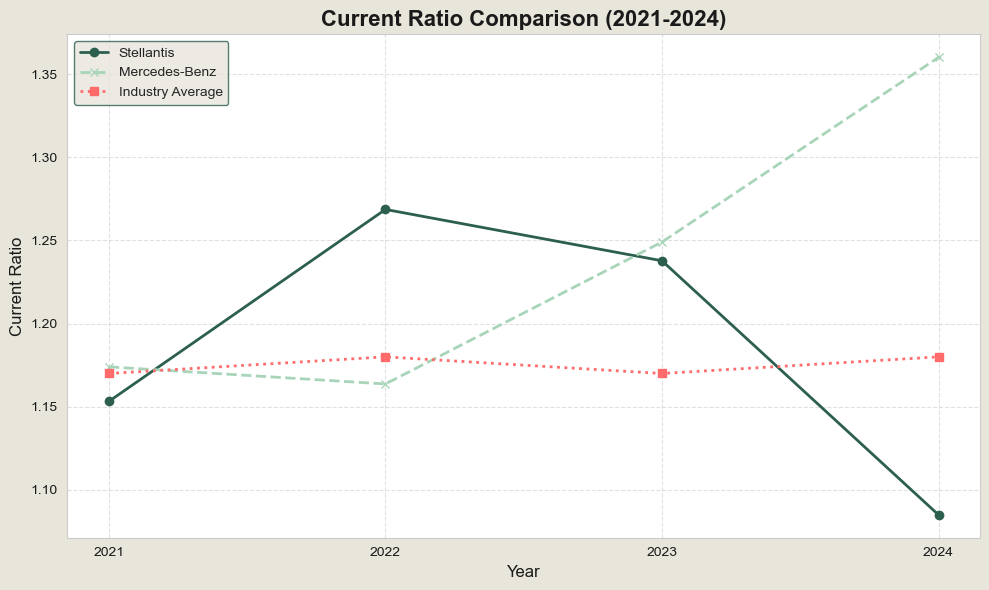

In [31]:
plt.figure(figsize=(10, 6), facecolor=PRIMARY_COLOR)
plt.plot(years, cr_stellantis, label='Stellantis', marker='o', color=SECONDARY_COLOR, linewidth=2)
plt.plot(years, cr_mercedes, label='Mercedes-Benz', marker='x', color='#A8D5BA', linewidth=2, linestyle='--')
plt.plot(years, [1.17, 1.18, 1.17, 1.18], label='Industry Average', marker='s', color='#FF6B6B', linewidth=2, linestyle=':')

plt.title('Current Ratio Comparison (2021-2024)', fontsize=16, color=TEXT_COLOR, fontweight='bold')
plt.xlabel('Year', fontsize=12, color=TEXT_COLOR)
plt.ylabel('Current Ratio', fontsize=12, color=TEXT_COLOR)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10, color=TEXT_COLOR)
plt.yticks(fontsize=10, color=TEXT_COLOR)
plt.legend(fontsize=10, facecolor=PRIMARY_COLOR, edgecolor=SECONDARY_COLOR)

plt.tight_layout()
plt.show()


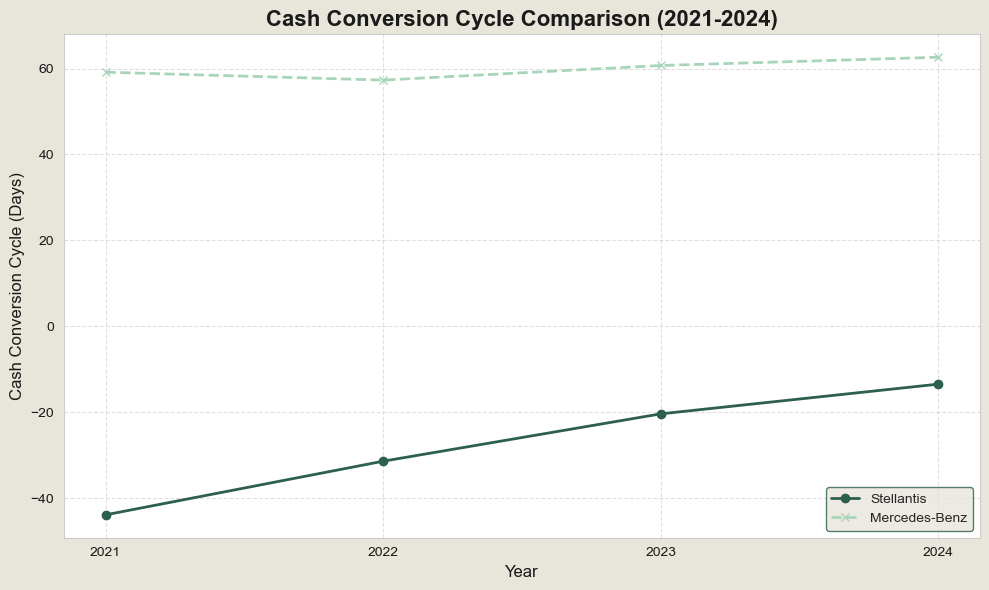

In [32]:
# Calculate Cash Conversion Cycle: A/R days + Inventory days - A/P days
ccc_stellantis = ar_days_s + inv_days_s - ap_days_s
ccc_mercedes = ar_days_m + inv_days_m - ap_days_m

plt.figure(figsize=(10, 6), facecolor=PRIMARY_COLOR)
plt.plot(years, ccc_stellantis, label='Stellantis', marker='o', color=SECONDARY_COLOR, linewidth=2)
plt.plot(years, ccc_mercedes, label='Mercedes-Benz', marker='x', color='#A8D5BA', linewidth=2, linestyle='--')

plt.title('Cash Conversion Cycle Comparison (2021-2024)', fontsize=16, color=TEXT_COLOR, fontweight='bold')
plt.xlabel('Year', fontsize=12, color=TEXT_COLOR)
plt.ylabel('Cash Conversion Cycle (Days)', fontsize=12, color=TEXT_COLOR)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10, color=TEXT_COLOR)
plt.yticks(fontsize=10, color=TEXT_COLOR)
plt.legend(fontsize=10, facecolor=PRIMARY_COLOR, edgecolor=SECONDARY_COLOR)

plt.tight_layout()
plt.show()
